In [2]:
import os
import glob
import pandas as pd 
import geopandas as gpd
from geopandas import GeoDataFrame
import os
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.statespace as smstate

from statsmodels.graphics.api import qqplot
 
pd.options.mode.chained_assignment = None
%matplotlib inline

In [3]:
path = "/Users/amber/Documents/ML/Projects/dataset/saleprice"

# Only Manhattan area

In [107]:
man_dfs = []
# Used separate skiprows values since Excel files were formatted slightly differently

for i in range(2011, 2018): # For 2011 to 2017
    temp_df = pd.read_excel('/Users/amber/Documents/ML/Projects/dataset/saleprice/{}_manhattan.xls'.format(i), skiprows=4)
    temp_df.rename(columns=lambda x: x.strip(), inplace=True)
    man_dfs.append(temp_df) 

In [108]:
man_df = pd.concat(man_dfs)

/Users/amber/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [109]:
# Remove the sales with Sale Price 0 (these are special situations like transfers to family members)
man_df_nz = man_df[man_df['SALE PRICE'] != 0]
man_df_nz = man_df[man_df['LAND SQUARE FEET'] != 0]
man_df_nz = man_df[man_df['GROSS SQUARE FEET'] != 0]

In [110]:
# Create columns with sale price per square feet
man_df_nz['price_per_lsf'] = man_df_nz['SALE PRICE']/man_df_nz['LAND SQUARE FEET']
man_df_nz['price_per_gsf'] = man_df_nz['SALE PRICE']/man_df_nz['GROSS SQUARE FEET']

In [111]:
# All Manhatann sales indexed by the sale date
man_groups = man_df_nz.set_index('SALE DATE')

In [112]:
"""
Grouping all manhattan sales by the month of the sale date and taking the mean of each column (including 
sale price)
"""
man_monthly_means = man_groups.resample('M').mean()
man_monthly_means.head()


,BLOCK,BOROUGH,COMMERCIAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET,LOT,RESIDENTIAL UNITS,SALE PRICE,TAX CLASS AT TIME OF SALE,TOTAL UNITS,YEAR BUILT,ZIP CODE,price_per_lsf,price_per_gsf
SALE DATE,,,,,,,,,,,,,,
2011-01-31,1153.532000,1.0,1.532000,56336.028000,4945.596000,38.204000,10.832000,1.704324e+06,2.956000,12.360000,1951.700000,10023.628000,480.640519,223.029309
2011-02-28,1201.511236,1.0,1.477528,60080.011236,5302.595506,43.926966,5.848315,2.806901e+06,2.994382,7.297753,1957.960674,10026.162921,614.014762,158.153050
2011-03-31,1115.109589,1.0,3.173516,49322.031963,5419.045662,87.497717,12.210046,3.930602e+06,2.949772,15.383562,1926.401826,10023.333333,866.577966,239.721415
2011-04-30,1125.125523,1.0,3.012552,74287.774059,7651.991632,40.962343,14.602510,3.811910e+06,3.196653,17.615063,1961.188285,10021.062762,598.891999,165.267200
2011-05-31,1101.750000,1.0,3.935714,71978.221429,6510.521429,48.903571,5.271429,8.108154e+06,3.242857,9.207143,1962.082143,10023.335714,inf,229.534758


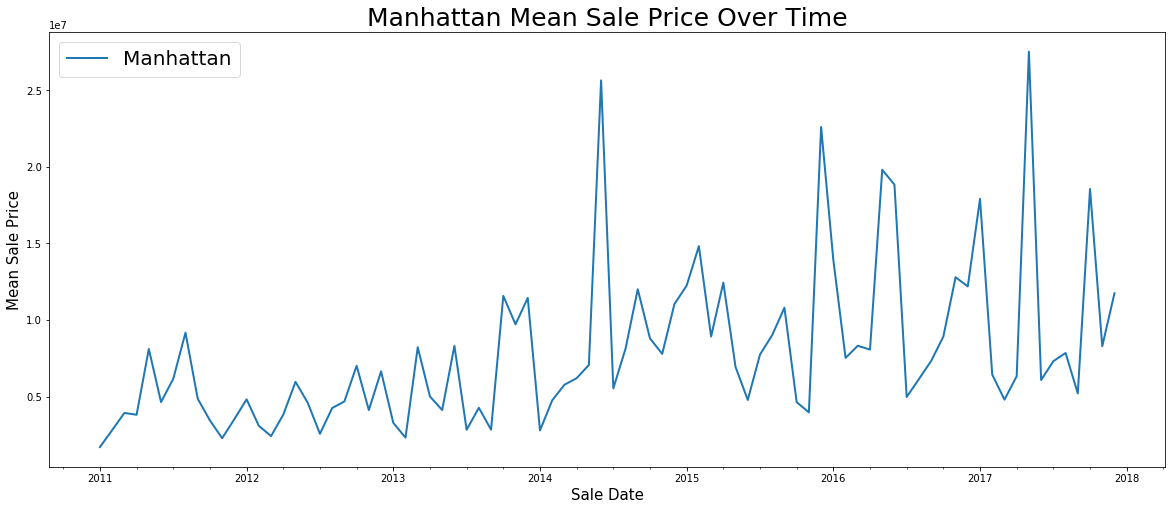

In [113]:
# Mean sale price of all buildings in Manhattan 
f, ax = plt.subplots(figsize=(20,8))
man_monthly_means['SALE PRICE'].plot(alpha=1,linewidth=2,ax=ax,label='Manhattan')
plt.title("Manhattan Mean Sale Price Over Time", fontsize=25)
plt.xlabel("Sale Date", fontsize=15)
plt.ylabel("Mean Sale Price", fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

# Brooklyn Area

In [114]:
bro_dfs = []
# Used separate skiprows values since Excel files were formatted slightly differently

for i in range(2011, 2018): # For 2011 to 2017
    bro_df = pd.read_excel('/Users/amber/Documents/ML/Projects/dataset/saleprice/{}_brooklyn.xls'.format(i), skiprows=4)
    bro_df.rename(columns=lambda x: x.strip(), inplace=True)
    bro_dfs.append(bro_df)

In [115]:
bro_df = pd.concat(bro_dfs)

/Users/amber/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [116]:
# Remove the sales with Sale Price 0 (these are special situations like transfers to family members)
bro_df_nz = bro_df[bro_df['SALE PRICE'] != 0]
bro_df_nz = bro_df[bro_df['LAND SQUARE FEET'] != 0]
bro_df_nz = bro_df[bro_df['GROSS SQUARE FEET'] != 0]

In [117]:
# Create columns with sale price per square feet
bro_df_nz['price_per_lsf'] = bro_df_nz['SALE PRICE']/bro_df_nz['LAND SQUARE FEET']
bro_df_nz['price_per_gsf'] = bro_df_nz['SALE PRICE']/bro_df_nz['GROSS SQUARE FEET']

In [118]:
# All brooklyn sales indexed by the sale date
bro_groups = bro_df_nz.set_index('SALE DATE')
bro_groups.head()

,ADDRESS,APARTMENT NUMBER,BLOCK,BOROUGH,BUILDING CLASS AS OF FINAL ROLL 17/18,BUILDING CLASS AT PRESENT,BUILDING CLASS AT TIME OF SALE,BUILDING CLASS CATEGORY,COMMERCIAL UNITS,EASE-MENT,...,RESIDENTIAL UNITS,SALE PRICE,TAX CLASS AS OF FINAL ROLL 17/18,TAX CLASS AT PRESENT,TAX CLASS AT TIME OF SALE,TOTAL UNITS,YEAR BUILT,ZIP CODE,price_per_lsf,price_per_gsf
SALE DATE,,,,,,,,,,,,,,,,,,,,,
2011-02-08,92 BAY 23RD STREET,,6373,3,NaN,A1,A1,01 ONE FAMILY HOMES,0,,...,1,0,NaN,1,1,1,1940,11214,0.000000,0.000000
2011-10-24,8668 BAY PARKWAY,,6380,3,NaN,A5,A5,01 ONE FAMILY HOMES,0,,...,1,610000,NaN,1,1,1,1960,11214,350.574713,342.312009
2011-07-11,1665 BATH AVENUE,,6399,3,NaN,S1,S1,01 ONE FAMILY HOMES,1,,...,1,0,NaN,1,1,2,1940,11214,0.000000,0.000000
2011-06-13,1657 BATH AVENUE,,6399,3,NaN,S1,S1,01 ONE FAMILY HOMES,1,,...,1,468000,NaN,1,1,2,1930,11214,371.428571,325.000000
2011-11-11,1967 BATH AVENUE,,6408,3,NaN,S1,S1,01 ONE FAMILY HOMES,1,,...,1,0,NaN,1,1,2,1920,11214,0.000000,0.000000


In [119]:
bro_monthly_means = bro_groups.resample('M').mean()

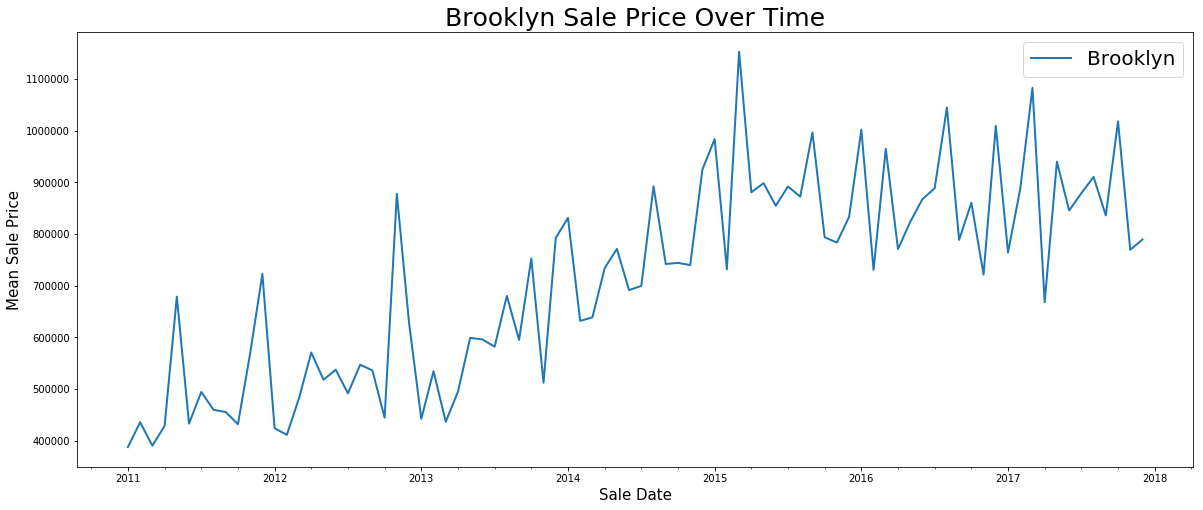

In [120]:
# Mean sale price of all buildings in NYC
f, ax = plt.subplots(figsize=(20,8))
bro_monthly_means['SALE PRICE'].plot(alpha=1,linewidth=2,ax=ax,label='Brooklyn')
plt.title("Brooklyn Sale Price Over Time", fontsize=25)
plt.xlabel("Sale Date", fontsize=15)
plt.ylabel("Mean Sale Price", fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

# Queens

In [121]:
qun_dfs = []
# Used separate skiprows values since Excel files were formatted slightly differently

for i in range(2011, 2018): # For 2011 to 2017
    qun_df = pd.read_excel('/Users/amber/Documents/ML/Projects/dataset/saleprice/{}_queens.xls'.format(i), skiprows=4)
    qun_df.rename(columns=lambda x: x.strip(), inplace=True)
    qun_dfs.append(qun_df)
    

In [122]:
qun_df = pd.concat(qun_dfs)

/Users/amber/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [123]:
# Remove the sales with Sale Price 0 (these are special situations like transfers to family members)
qun_df_nz = qun_df[qun_df['SALE PRICE'] != 0]
qun_df_nz = qun_df[qun_df['LAND SQUARE FEET'] != 0]
qun_df_nz = qun_df[qun_df['GROSS SQUARE FEET'] != 0]

In [124]:
# Create columns with sale price per square feet
qun_df_nz['price_per_lsf'] =qun_df_nz['SALE PRICE']/qun_df_nz['LAND SQUARE FEET']
qun_df_nz['price_per_gsf'] =qun_df_nz['SALE PRICE']/qun_df_nz['GROSS SQUARE FEET']

In [125]:
# All queens sales indexed by the sale date
qun_groups = qun_df_nz.set_index('SALE DATE')

In [126]:
qun_monthly_means =qun_groups.resample('M').mean()

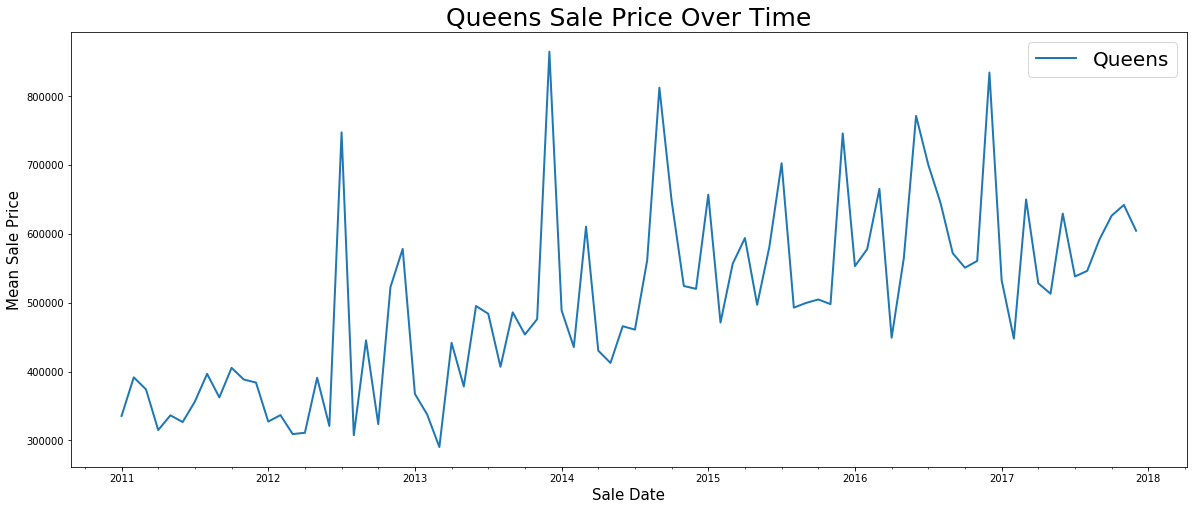

In [127]:
# Mean sale price of all buildings in NYC
f, ax = plt.subplots(figsize=(20,8))
qun_monthly_means['SALE PRICE'].plot(alpha=1,linewidth=2,ax=ax,label='Queens')
plt.title("Queens Sale Price Over Time", fontsize=25)
plt.xlabel("Sale Date", fontsize=15)
plt.ylabel("Mean Sale Price", fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

# Bronx

In [128]:
bronx_dfs = []
# Used separate skiprows values since Excel files were formatted slightly differently

for i in range(2011, 2018): # For 2011 to 2017
    bronx_df = pd.read_excel('/Users/amber/Documents/ML/Projects/dataset/saleprice/{}_bronx.xls'.format(i), skiprows=4)
    bronx_df.rename(columns=lambda x: x.strip(), inplace=True)
    bronx_dfs.append(bronx_df)
    

In [129]:
bronx_df = pd.concat(bronx_dfs)

/Users/amber/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [130]:
bronx_df_nz = bronx_df[bronx_df['SALE PRICE'] != 0]
bronx_df_nz = bronx_df[bronx_df['LAND SQUARE FEET'] != 0]
bronx_df_nz = bronx_df[bronx_df['GROSS SQUARE FEET'] != 0]

In [131]:
# Create columns with sale price per square feet
bronx_df_nz['price_per_lsf'] =bronx_df_nz['SALE PRICE']/bronx_df_nz['LAND SQUARE FEET']
bronx_df_nz['price_per_gsf'] =bronx_df_nz['SALE PRICE']/bronx_df_nz['GROSS SQUARE FEET']

In [132]:
bronx_groups = bronx_df_nz.set_index('SALE DATE')
bronx_monthly_means =bronx_groups.resample('M').mean()

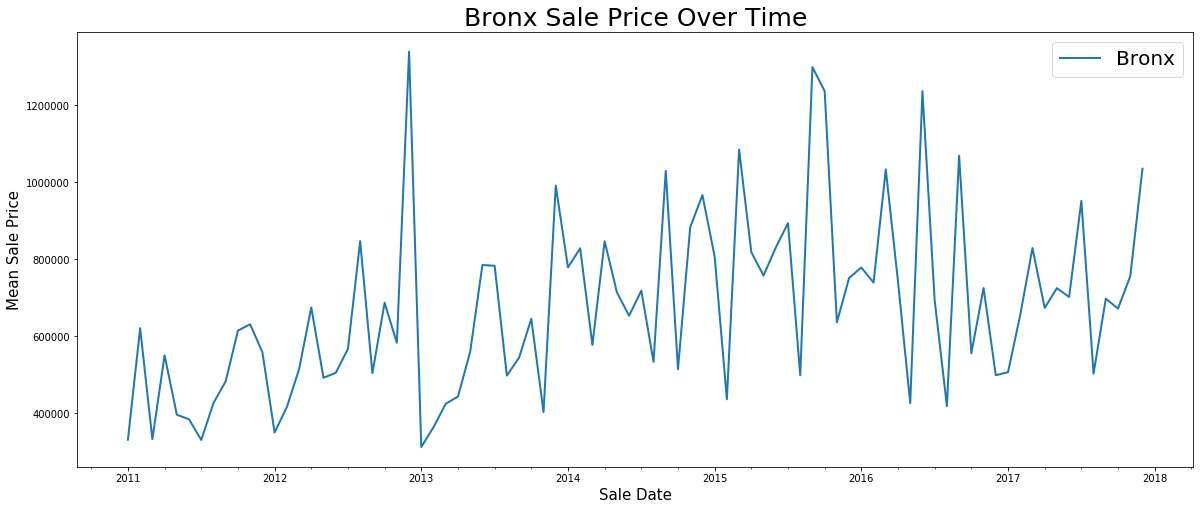

In [133]:
# Mean sale price of all buildings in NYC
f, ax = plt.subplots(figsize=(20,8))
bronx_monthly_means['SALE PRICE'].plot(alpha=1,linewidth=2,ax=ax,label='Bronx')
plt.title("Bronx Sale Price Over Time", fontsize=25)
plt.xlabel("Sale Date", fontsize=15)
plt.ylabel("Mean Sale Price", fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

# statenisland

In [134]:
stan_dfs = []
# Used separate skiprows values since Excel files were formatted slightly differently

for i in range(2011, 2018): # For 2011 to 2017
    stan_df = pd.read_excel('/Users/amber/Documents/ML/Projects/dataset/saleprice/{}_statenisland.xls'.format(i), skiprows=4)
    stan_df.rename(columns=lambda x: x.strip(), inplace=True)
    stan_dfs.append(stan_df)

In [135]:
stan_df = pd.concat(stan_dfs)

/Users/amber/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [136]:
stan_df_nz = stan_df[stan_df['SALE PRICE'] != 0]
stan_df_nz = stan_df[stan_df['LAND SQUARE FEET'] != 0]
stan_df_nz = stan_df[stan_df['GROSS SQUARE FEET'] != 0]

In [137]:
# Create columns with sale price per square feet
stan_df_nz['price_per_lsf'] =stan_df_nz['SALE PRICE']/stan_df_nz['LAND SQUARE FEET']
stan_df_nz['price_per_gsf'] =stan_df_nz['SALE PRICE']/stan_df_nz['GROSS SQUARE FEET']

In [138]:
stan_groups = stan_df_nz.set_index('SALE DATE')
stan_monthly_means =stan_groups.resample('M').mean()

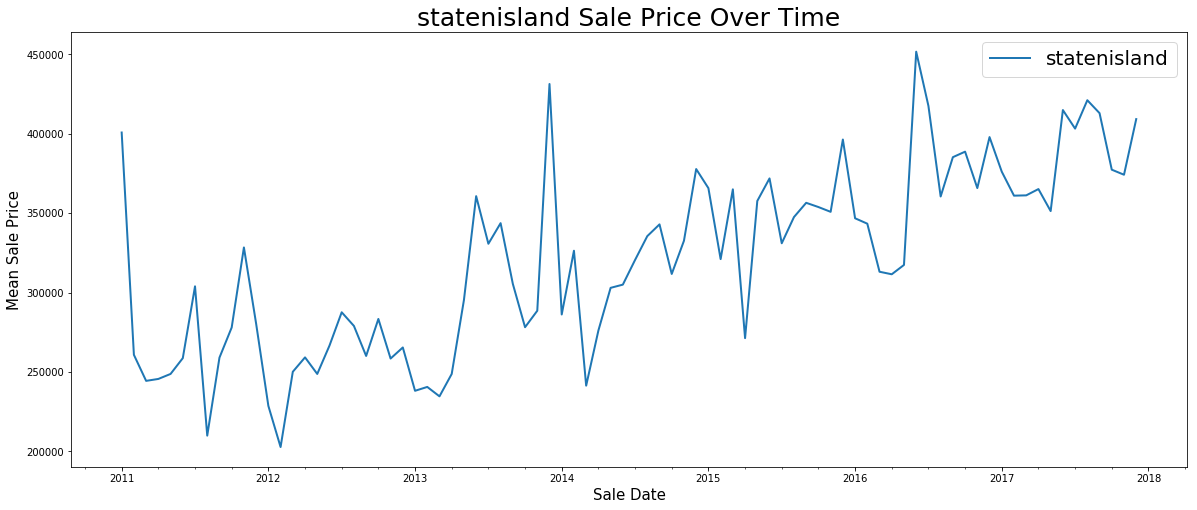

In [139]:
# Mean sale price of all buildings in NYC
f, ax = plt.subplots(figsize=(20,8))
stan_monthly_means['SALE PRICE'].plot(alpha=1,linewidth=2,ax=ax,label='statenisland')
plt.title("statenisland Sale Price Over Time", fontsize=25)
plt.xlabel("Sale Date", fontsize=15)
plt.ylabel("Mean Sale Price", fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

# Whole NYC area


In [140]:
all_dfs = []
# Used separate skiprows values since Excel files were formatted slightly differently

for i in range(2011, 2018): # For 2011 to 2017
    man_df = pd.read_excel('/Users/amber/Documents/ML/Projects/dataset/saleprice/{}_manhattan.xls'.format(i), skiprows=4)
    man_df.rename(columns=lambda x: x.strip(), inplace=True)
    all_dfs.append(man_df)
for i in range(2011, 2018): # For 2011 to 2017
    bro_df = pd.read_excel('/Users/amber/Documents/ML/Projects/dataset/saleprice/{}_brooklyn.xls'.format(i), skiprows=4)
    bro_df.rename(columns=lambda x: x.strip(), inplace=True)
    all_dfs.append(bro_df)
for i in range(2011, 2018): # For 2011 to 2017
    qs_df = pd.read_excel('/Users/amber/Documents/ML/Projects/dataset/saleprice/{}_queens.xls'.format(i), skiprows=4)
    qs_df.rename(columns=lambda x: x.strip(), inplace=True)
    all_dfs.append(qs_df)
for i in range(2011, 2018): # For 2011 to 2017
    stan_df = pd.read_excel('/Users/amber/Documents/ML/Projects/dataset/saleprice/{}_statenisland.xls'.format(i), skiprows=4)
    stan_df.rename(columns=lambda x: x.strip(), inplace=True)
    all_dfs.append(stan_df)
for i in range(2011, 2018): # For 2011 to 2017
    bronx_df = pd.read_excel('/Users/amber/Documents/ML/Projects/dataset/saleprice/{}_bronx.xls'.format(i), skiprows=4)
    bronx_df.rename(columns=lambda x: x.strip(), inplace=True)
    all_dfs.append(bronx_df)
    

In [141]:
all_df = pd.concat(all_dfs)

/Users/amber/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [149]:
all_df.to_csv("all_price.csv")

In [142]:

# Remove the sales with Sale Price 0 (these are special situations like transfers to family members)
all_df_nz = all_df[all_df['SALE PRICE'] != 0]
all_df_nz = all_df[all_df['LAND SQUARE FEET'] != 0]
all_df_nz = all_df[all_df['GROSS SQUARE FEET'] != 0]



In [143]:
# Create columns with sale price per square feet
all_df_nz['price_per_lsf'] = all_df_nz['SALE PRICE']/all_df_nz['LAND SQUARE FEET']
all_df_nz['price_per_gsf'] = all_df_nz['SALE PRICE']/all_df_nz['GROSS SQUARE FEET']

In [144]:

# All nyc sales indexed by the sale date
all_groups = all_df_nz.set_index('SALE DATE')
all_groups.head()

,ADDRESS,APARTMENT NUMBER,BLOCK,BOROUGH,BUILDING CLASS AS OF FINAL ROLL 17/18,BUILDING CLASS AT PRESENT,BUILDING CLASS AT TIME OF SALE,BUILDING CLASS CATEGORY,COMMERCIAL UNITS,EASE-MENT,...,RESIDENTIAL UNITS,SALE PRICE,TAX CLASS AS OF FINAL ROLL 17/18,TAX CLASS AT PRESENT,TAX CLASS AT TIME OF SALE,TOTAL UNITS,YEAR BUILT,ZIP CODE,price_per_lsf,price_per_gsf
SALE DATE,,,,,,,,,,,,,,,,,,,,,
2011-08-26,743 EAST 6TH STREET,,376,1,NaN,S1,S1,01 ONE FAMILY HOMES,1,,...,1,10,NaN,1,1,2,1940,10009,0.004785,0.002717
2011-12-21,40 AVENUE C,,373,1,NaN,S2,S2,02 TWO FAMILY HOMES,1,,...,2,0,NaN,1,1,3,1901,10009,0.000000,0.000000
2011-09-08,316 EAST 3RD STREET,,372,1,NaN,C3,C3,07 RENTALS - WALKUP APARTMENTS,0,,...,4,3500000,NaN,2A,2,4,1900,10009,609.119387,1296.296296
2011-07-25,719 E 6TH ST,,376,1,NaN,C4,C4,07 RENTALS - WALKUP APARTMENTS,0,,...,16,2966835,NaN,2,2,16,1900,10009,863.204830,323.184641
2011-06-10,116 AVENUE C,,377,1,NaN,C7,C7,07 RENTALS - WALKUP APARTMENTS,3,,...,22,0,NaN,2,2,25,1900,10009,0.000000,0.000000


In [145]:
all_monthly_means = all_groups.resample('M').mean()
all_monthly_means.head()


,BLOCK,BOROUGH,COMMERCIAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET,LOT,RESIDENTIAL UNITS,SALE PRICE,TAX CLASS AT TIME OF SALE,TOTAL UNITS,YEAR BUILT,ZIP CODE,price_per_lsf,price_per_gsf
SALE DATE,,,,,,,,,,,,,,
2011-01-31,5024.012526,3.356994,0.298539,8949.366736,4158.489910,59.374739,3.917189,4.801718e+05,1.441197,4.215031,1938.016701,10971.898747,148.320815,144.375231
2011-02-28,5212.082989,3.417199,0.282388,8169.060083,4581.961322,58.018776,2.850169,5.709833e+05,1.380774,3.129553,1938.971836,11022.728877,155.878788,144.653115
2011-03-31,5266.663331,3.414656,0.354032,6879.306651,3806.844614,60.041495,3.708064,5.883389e+05,1.357269,4.061507,1937.522660,11018.838140,161.551345,142.385442
2011-04-30,5117.242712,3.367404,0.422901,10157.443274,4369.345276,58.059361,4.362487,6.582818e+05,1.427819,4.784686,1940.003512,10991.698279,161.350125,145.131107
2011-05-31,5001.232833,3.334398,0.518365,10459.279144,4025.697541,55.150112,3.128074,1.131923e+06,1.427659,3.645161,1940.654104,10997.872565,inf,219.942104


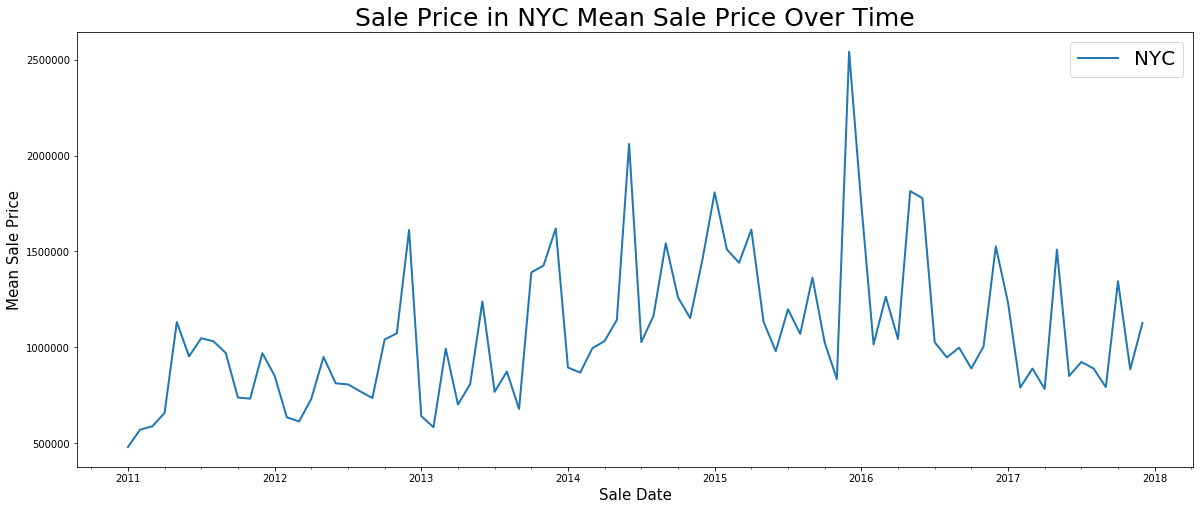

In [146]:
# Mean sale price of all buildings in NYC
f, ax = plt.subplots(figsize=(20,8))
all_monthly_means['SALE PRICE'].plot(alpha=1,linewidth=2,ax=ax,label='NYC')
plt.title("Sale Price in NYC Mean Sale Price Over Time", fontsize=25)
plt.xlabel("Sale Date", fontsize=15)
plt.ylabel("Mean Sale Price", fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

# Compare with different borough 

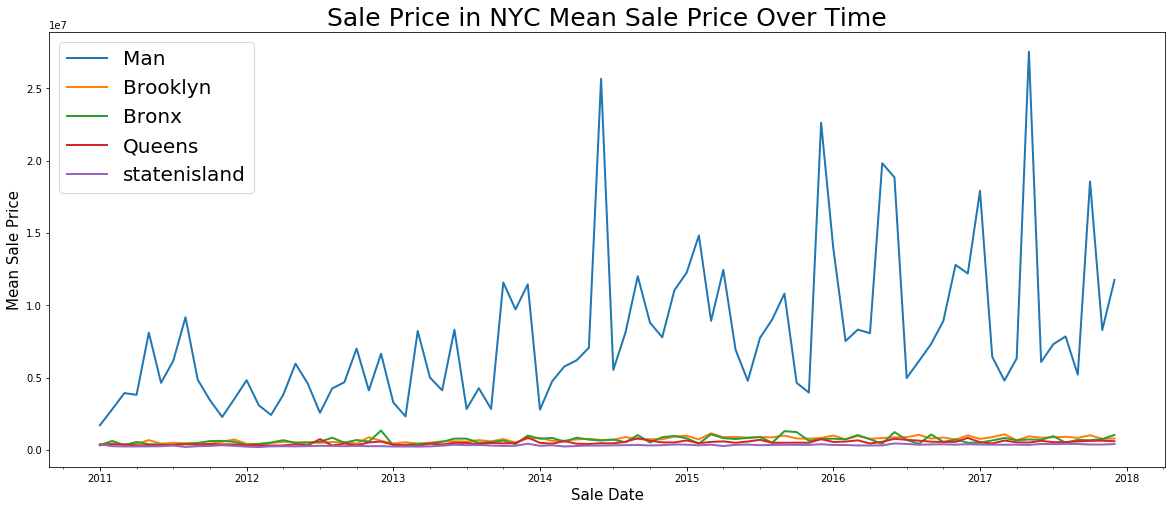

In [147]:
# Mean sale price of all buildings in NYC
f, ax = plt.subplots(figsize=(20,8))
man_monthly_means['SALE PRICE'].plot(alpha=1,linewidth=2,ax=ax,label='Man')
bro_monthly_means['SALE PRICE'].plot(alpha=1,linewidth=2,ax=ax,label='Brooklyn')
bronx_monthly_means['SALE PRICE'].plot(alpha=1,linewidth=2,ax=ax,label='Bronx')
qun_monthly_means['SALE PRICE'].plot(alpha=1,linewidth=2,ax=ax,label='Queens')
stan_monthly_means['SALE PRICE'].plot(alpha=1,linewidth=2,ax=ax,label='statenisland')
plt.title("Sale Price in NYC Mean Sale Price Over Time", fontsize=25)
plt.xlabel("Sale Date", fontsize=15)
plt.ylabel("Mean Sale Price", fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

In [148]:
## Manhattan has way more sales than other area and also the price for each building are higher 

# will make some graph for sale count and also just for sale data, apply SVM is ok. considering the census data that manrique shared. lets think mnore